## Kütüphaneler

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


## Veri

In [2]:
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy().reshape((-1, 28, 28))

In [3]:
num_random_images = 10000
random_images = np.random.randint(0, 256, size=(num_random_images, 28, 28))

combined_images = np.concatenate([images, random_images])
combined_labels = np.concatenate([mnist.target.astype(int), np.full(num_random_images, -1)])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(combined_images, combined_labels, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print("Training dataset size:", X_train.shape)
print("Training labels size:", y_train.shape)
print("Test dataset size:", X_test.shape)
print("Test labels size:", y_test.shape)

Training dataset size: (64000, 784)
Training labels size: (64000,)
Test dataset size: (16000, 784)
Test labels size: (16000,)


## Model

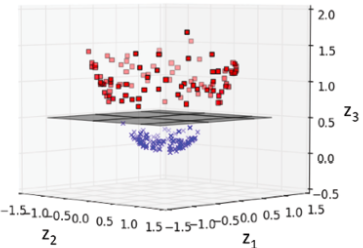

#### SVC RBF algoritması, veri noktalarını sınıflandırmak için bir karar sınırı oluşturur. Ancak, diğer SVC türlerinden farklı olarak, RBF çekirdek fonksiyonunu kullanır. Bu çekirdek fonksiyonu, veri noktalarını yüksek boyutlu uzaylara projelendirmek ve ardından bu uzayda sınıflandırma yapmak için kullanılır.

In [5]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf",random_state = 21)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)

print("SVC RBF doğruluk skoru:", accuracy)

SVC RBF doğruluk skoru: 0.9789375


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_params = {
    "C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],  # Aşırı uyum (overfitting) ve düşük uyum (underfitting) arasındaki dengeyi sağlamak için kullanılır
    "gamma": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],  # Karar sınırlarının daha keskin olmasını sağlar
    "shrinking": [True, False],  # Shrinking heuristic kullanımı
    "probability": [True, False],  # Olasılık tahminlerinin etkinleştirilmesi
    "tol": [1e-4, 1e-3, 1e-2],  # Durdurma kriteri için tolerans
    "cache_size": [100, 200, 500],  # Kernel matrisini depolamak için ayrılacak RAM miktarı (MB cinsinden)
    "class_weight": [None, "balanced"],  # Sınıflara ağırlık atama
    "max_iter": [-1, 100, 500, 1000],  # Maksimum yineleme sayısı
    "random_state": [None, 42]  # Rastgele durumun kontrolü
}

In [ ]:
scv = SVC(kernel="rbf",random_state = 21)
svc_cv = GridSearchCV(scv, svc_params, cv=10, n_jobs=-1)
svc_cv.fit(X_train, y_train)
print("en iyi parametreler: " + str(svc_cv.best_params_))

In [ ]:
svc_tuned = SVC(kernel="rbf",random_state = 21)
svc_tuned.fit(x_train,y_train)
y_pred = svc_tuned.predict(x_test)
print("skor: "+str(accuracy_score(y_test,y_pred)))

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(confisuion_matrix(y_test,y_pred))

In [ ]:
print(cross_val_score(svc_tuned,x_test,y_test,cv=10).mean())

## Resim Hazırlama 

In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    # Resmi açma ve boyutunu (8x8 piksel) değiştirme
    image = Image.open(image_path)
    image = image.resize((8, 8))

    # Resmi siyah-beyaz yapma ve numpy dizisine dönüştürme
    image = image.convert('L')
    image = np.array(image)

    # Görüntüyü düzleştirme (1D vektör)
    image = image.flatten()

    return image

## Model Tahmini

In [ ]:
def classify_digit(image_path, model):
    # Resmi önceden işleme
    image = preprocess_image(image_path)

    # Resmi modelle sınıflandırma
    predicted_digit = model.predict([image])

    return predicted_digit[0]

In [ ]:
predicted_digit = classify_digit(image_path, model)
print("Tahmin edilen rakam:", predicted_digit)